In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import numpy as np
import pickle
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score, mean_absolute_error

This project received funding from the European Union’s Horizon 2020 research and innovation programme [952914] (FindingPheno).

In [2]:
DATA_RAW = "../../data/raw/"
DATA_PROCESSED = "../../data/processed/"

In [3]:
genome = pd.read_csv("../../data/raw/HoloFish_HostG_GenotypeProbability.dose.gz", sep=" ",  index_col=0,)
genome

,alleleA,alleleB,Ind0,Ind1,Ind2,Ind3,Ind4,Ind5,Ind6,Ind7,...,Ind351,Ind352,Ind353,Ind354,Ind355,Ind356,Ind357,Ind358,Ind359,Ind360
marker,,,,,,,,,,,,,,,,,,,,,
NC_059442.1_84727,0,2,1.0000,0.0013,0.9780,0.0035,0.0002,0.0005,0.0000,0.0000,...,0.9999,0.1223,0.0013,0.9994,0.0013,0.9996,0.0347,0.0053,0.0035,0.8773
NC_059442.1_84730,1,3,1.0000,0.0005,0.9713,0.0020,0.0001,0.0001,0.0000,0.0000,...,0.9995,0.1111,0.0005,0.9985,0.0005,0.9989,0.0289,0.0040,0.0020,0.8659
NC_059442.1_132329,0,1,0.0334,0.0647,0.1294,0.1294,0.0086,0.0086,0.0170,0.1294,...,0.0043,0.0334,0.0334,0.9559,0.9886,0.1294,0.0334,0.1294,0.0000,0.0022
NC_059442.1_141907,2,3,0.2496,1.0000,1.0000,1.0002,1.0000,0.0419,1.0000,1.0003,...,1.9880,0.0058,1.0000,0.0005,1.0000,1.8395,1.0000,1.0013,0.0001,1.0000
NC_059442.1_141912,2,0,0.2462,1.0000,1.0000,1.0009,1.0000,0.0395,1.0000,1.0001,...,1.9871,0.0052,1.0000,0.0004,1.0000,1.8367,1.0000,1.0063,0.0001,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NW_025550964.1_235908,3,1,0.0003,0.0546,0.0000,0.0006,0.9914,0.0759,0.0031,0.0000,...,0.0474,0.0066,0.0997,0.0382,0.0156,0.1073,0.0001,0.0116,0.0000,0.0000
NW_025550964.1_236516,3,1,0.0005,1.0000,0.0075,1.0000,0.0003,0.0022,0.0115,0.0000,...,0.0111,0.0004,1.0941,0.0003,0.0562,0.0261,0.0004,1.0612,0.0000,0.0000
NW_025550964.1_236524,3,1,0.0024,0.0021,0.9900,0.0205,0.0006,0.0011,0.0079,0.0000,...,0.9986,0.0080,0.0216,0.0019,0.0778,0.9941,0.0087,0.0701,0.9903,0.0037


In [4]:
genome.index.names = ["fish.id"]
genome

,alleleA,alleleB,Ind0,Ind1,Ind2,Ind3,Ind4,Ind5,Ind6,Ind7,...,Ind351,Ind352,Ind353,Ind354,Ind355,Ind356,Ind357,Ind358,Ind359,Ind360
fish.id,,,,,,,,,,,,,,,,,,,,,
NC_059442.1_84727,0,2,1.0000,0.0013,0.9780,0.0035,0.0002,0.0005,0.0000,0.0000,...,0.9999,0.1223,0.0013,0.9994,0.0013,0.9996,0.0347,0.0053,0.0035,0.8773
NC_059442.1_84730,1,3,1.0000,0.0005,0.9713,0.0020,0.0001,0.0001,0.0000,0.0000,...,0.9995,0.1111,0.0005,0.9985,0.0005,0.9989,0.0289,0.0040,0.0020,0.8659
NC_059442.1_132329,0,1,0.0334,0.0647,0.1294,0.1294,0.0086,0.0086,0.0170,0.1294,...,0.0043,0.0334,0.0334,0.9559,0.9886,0.1294,0.0334,0.1294,0.0000,0.0022
NC_059442.1_141907,2,3,0.2496,1.0000,1.0000,1.0002,1.0000,0.0419,1.0000,1.0003,...,1.9880,0.0058,1.0000,0.0005,1.0000,1.8395,1.0000,1.0013,0.0001,1.0000
NC_059442.1_141912,2,0,0.2462,1.0000,1.0000,1.0009,1.0000,0.0395,1.0000,1.0001,...,1.9871,0.0052,1.0000,0.0004,1.0000,1.8367,1.0000,1.0063,0.0001,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NW_025550964.1_235908,3,1,0.0003,0.0546,0.0000,0.0006,0.9914,0.0759,0.0031,0.0000,...,0.0474,0.0066,0.0997,0.0382,0.0156,0.1073,0.0001,0.0116,0.0000,0.0000
NW_025550964.1_236516,3,1,0.0005,1.0000,0.0075,1.0000,0.0003,0.0022,0.0115,0.0000,...,0.0111,0.0004,1.0941,0.0003,0.0562,0.0261,0.0004,1.0612,0.0000,0.0000
NW_025550964.1_236524,3,1,0.0024,0.0021,0.9900,0.0205,0.0006,0.0011,0.0079,0.0000,...,0.9986,0.0080,0.0216,0.0019,0.0778,0.9941,0.0087,0.0701,0.9903,0.0037


In [5]:
metadata = pd.read_csv("../../data/raw/HoloFish_FishVariables_20221116.csv", index_col=0)
metadata

,Size.class,Gutted.Weight.kg,Tapeworm.index,Tapeworm.present,Feed.Type,Metabolome.batch,HostG.Ind.ID,Dataset.MetaG,Dataset.HostRNA,Dataset.Metabolome,Dataset.HostG
Sample.ID,,,,,,,,,,,
F001,Medium,3.240,1,True,Feed1,Batch_1,Ind0,False,True,True,True
F010,Small,1.770,1,True,Feed1,Batch_1,Ind8,True,True,True,True
F100,Medium,3.150,1,True,Feed1,NaN,NaN,False,False,False,False
F101,Medium,3.210,1,True,Feed1,Batch_3,Ind87,True,True,True,True
F102,Medium,3.340,1,True,Feed1,Batch_3,Ind88,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
F416,Large,5.840,2,True,Feed2,NaN,Ind324,False,True,True,True
F417,Small,2.310,2,True,Feed2,NaN,Ind325,True,True,True,True
F418,Small,2.360,0,False,Feed2,NaN,Ind326,True,True,True,True


In [6]:
for col in genome.columns:
    
    gwas_meta_id = metadata[metadata["HostG.Ind.ID"] == col].index
    #print(gwas_meta_id)
    if len(gwas_meta_id) > 0:
        new_col = gwas_meta_id[0]
        # print(col)
        # print(new_col)
        genome.rename(columns={col:new_col}, inplace=True)

In [7]:
genome

,alleleA,alleleB,F001,F002,F003,F004,F005,F006,F007,F008,...,F444,F445,F446,F447,F448,F449,F450,F451,F460,F461
fish.id,,,,,,,,,,,,,,,,,,,,,
NC_059442.1_84727,0,2,1.0000,0.0013,0.9780,0.0035,0.0002,0.0005,0.0000,0.0000,...,0.9999,0.1223,0.0013,0.9994,0.0013,0.9996,0.0347,0.0053,0.0035,0.8773
NC_059442.1_84730,1,3,1.0000,0.0005,0.9713,0.0020,0.0001,0.0001,0.0000,0.0000,...,0.9995,0.1111,0.0005,0.9985,0.0005,0.9989,0.0289,0.0040,0.0020,0.8659
NC_059442.1_132329,0,1,0.0334,0.0647,0.1294,0.1294,0.0086,0.0086,0.0170,0.1294,...,0.0043,0.0334,0.0334,0.9559,0.9886,0.1294,0.0334,0.1294,0.0000,0.0022
NC_059442.1_141907,2,3,0.2496,1.0000,1.0000,1.0002,1.0000,0.0419,1.0000,1.0003,...,1.9880,0.0058,1.0000,0.0005,1.0000,1.8395,1.0000,1.0013,0.0001,1.0000
NC_059442.1_141912,2,0,0.2462,1.0000,1.0000,1.0009,1.0000,0.0395,1.0000,1.0001,...,1.9871,0.0052,1.0000,0.0004,1.0000,1.8367,1.0000,1.0063,0.0001,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NW_025550964.1_235908,3,1,0.0003,0.0546,0.0000,0.0006,0.9914,0.0759,0.0031,0.0000,...,0.0474,0.0066,0.0997,0.0382,0.0156,0.1073,0.0001,0.0116,0.0000,0.0000
NW_025550964.1_236516,3,1,0.0005,1.0000,0.0075,1.0000,0.0003,0.0022,0.0115,0.0000,...,0.0111,0.0004,1.0941,0.0003,0.0562,0.0261,0.0004,1.0612,0.0000,0.0000
NW_025550964.1_236524,3,1,0.0024,0.0021,0.9900,0.0205,0.0006,0.0011,0.0079,0.0000,...,0.9986,0.0080,0.0216,0.0019,0.0778,0.9941,0.0087,0.0701,0.9903,0.0037


In [8]:
genome= genome.T
genome

fish.id,NC_059442.1_84727,NC_059442.1_84730,NC_059442.1_132329,NC_059442.1_141907,NC_059442.1_141912,NC_059442.1_170531,NC_059442.1_170604,NC_059442.1_170619,NC_059442.1_170628,NC_059442.1_179561,...,NW_025550964.1_222391,NW_025550964.1_235749,NW_025550964.1_235790,NW_025550964.1_235823,NW_025550964.1_235828,NW_025550964.1_235908,NW_025550964.1_236516,NW_025550964.1_236524,NW_025550964.1_236580,NW_025550964.1_236861
alleleA,0.0000,1.0000,0.0000,2.0000,2.0000,3.0000,3.0000,2.0000,0.0000,3.0000,...,2.0000,0.0000,2.0000,1.0000,1.0000,3.0000,3.0000,3.0000,3.0000,0.0000
alleleB,2.0000,3.0000,1.0000,3.0000,0.0000,1.0000,0.0000,3.0000,2.0000,1.0000,...,1.0000,2.0000,0.0000,3.0000,2.0000,1.0000,1.0000,1.0000,0.0000,1.0000
F001,1.0000,1.0000,0.0334,0.2496,0.2462,0.1066,0.2837,0.1870,0.2278,0.1306,...,0.0029,0.0004,0.0000,0.0000,0.0000,0.0003,0.0005,0.0024,0.0076,1.0000
F002,0.0013,0.0005,0.0647,1.0000,1.0000,0.0009,0.0024,0.0004,0.7897,0.0027,...,0.9932,0.0093,0.0020,0.0020,0.0020,0.0546,1.0000,0.0021,0.0548,1.0000
F003,0.9780,0.9713,0.1294,1.0000,1.0000,1.0533,0.2837,0.1870,0.2278,0.0025,...,0.5112,1.0000,0.9900,0.9928,0.9882,0.0000,0.0075,0.9900,0.0619,0.3434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F449,0.9996,0.9989,0.1294,1.8395,1.8367,0.0009,0.0082,0.0068,0.0120,0.0084,...,0.9952,1.0001,0.2041,0.9799,0.9124,0.1073,0.0261,0.9941,1.0000,0.0012
F450,0.0347,0.0289,0.0334,1.0000,1.0000,0.0001,0.0000,0.0001,0.0000,0.0001,...,0.0005,0.0000,1.0000,1.0000,1.0000,0.0001,0.0004,0.0087,0.0264,0.0459
F451,0.0053,0.0040,0.1294,1.0013,1.0063,0.0070,0.0820,0.0225,0.9975,0.0328,...,0.1238,0.0598,0.0064,0.0002,0.0002,0.0116,1.0612,0.0701,0.1171,0.9997
F460,0.0035,0.0020,0.0000,0.0001,0.0001,0.1066,0.2837,0.1870,0.2278,0.1295,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9903,0.8004,1.0000


In [9]:
genome.drop(["alleleA", "alleleB"], inplace=True)
genome

fish.id,NC_059442.1_84727,NC_059442.1_84730,NC_059442.1_132329,NC_059442.1_141907,NC_059442.1_141912,NC_059442.1_170531,NC_059442.1_170604,NC_059442.1_170619,NC_059442.1_170628,NC_059442.1_179561,...,NW_025550964.1_222391,NW_025550964.1_235749,NW_025550964.1_235790,NW_025550964.1_235823,NW_025550964.1_235828,NW_025550964.1_235908,NW_025550964.1_236516,NW_025550964.1_236524,NW_025550964.1_236580,NW_025550964.1_236861
F001,1.0000,1.0000,0.0334,0.2496,0.2462,0.1066,0.2837,0.1870,0.2278,0.1306,...,0.0029,0.0004,0.0000,0.0000,0.0000,0.0003,0.0005,0.0024,0.0076,1.0000
F002,0.0013,0.0005,0.0647,1.0000,1.0000,0.0009,0.0024,0.0004,0.7897,0.0027,...,0.9932,0.0093,0.0020,0.0020,0.0020,0.0546,1.0000,0.0021,0.0548,1.0000
F003,0.9780,0.9713,0.1294,1.0000,1.0000,1.0533,0.2837,0.1870,0.2278,0.0025,...,0.5112,1.0000,0.9900,0.9928,0.9882,0.0000,0.0075,0.9900,0.0619,0.3434
F004,0.0035,0.0020,0.1294,1.0002,1.0009,0.0001,0.0629,0.0265,0.0258,0.0200,...,0.9926,0.0021,0.2328,0.9999,1.0000,0.0006,1.0000,0.0205,0.0111,0.9992
F005,0.0002,0.0001,0.0086,1.0000,1.0000,0.0009,0.0001,0.0000,0.0000,0.0006,...,0.0004,0.0059,0.5884,0.0018,0.0009,0.9914,0.0003,0.0006,0.0001,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F449,0.9996,0.9989,0.1294,1.8395,1.8367,0.0009,0.0082,0.0068,0.0120,0.0084,...,0.9952,1.0001,0.2041,0.9799,0.9124,0.1073,0.0261,0.9941,1.0000,0.0012
F450,0.0347,0.0289,0.0334,1.0000,1.0000,0.0001,0.0000,0.0001,0.0000,0.0001,...,0.0005,0.0000,1.0000,1.0000,1.0000,0.0001,0.0004,0.0087,0.0264,0.0459
F451,0.0053,0.0040,0.1294,1.0013,1.0063,0.0070,0.0820,0.0225,0.9975,0.0328,...,0.1238,0.0598,0.0064,0.0002,0.0002,0.0116,1.0612,0.0701,0.1171,0.9997
F460,0.0035,0.0020,0.0000,0.0001,0.0001,0.1066,0.2837,0.1870,0.2278,0.1295,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9903,0.8004,1.0000


In [10]:
weights = pd.DataFrame(metadata["Gutted.Weight.kg"])
weights

,Gutted.Weight.kg
Sample.ID,
F001,3.240
F010,1.770
F100,3.150
F101,3.210
F102,3.340
...,...
F416,5.840
F417,2.310
F418,2.360


In [11]:
genome_with_weights = pd.merge(left=weights, right=genome, left_on= "Sample.ID", right_on=genome.index)
genome_with_weights.index = genome_with_weights["Sample.ID"]
genome_with_weights.drop("Sample.ID", axis=1, inplace=True)
genome_with_weights.sort_index(inplace=True)
genome_with_weights

,Gutted.Weight.kg,NC_059442.1_84727,NC_059442.1_84730,NC_059442.1_132329,NC_059442.1_141907,NC_059442.1_141912,NC_059442.1_170531,NC_059442.1_170604,NC_059442.1_170619,NC_059442.1_170628,...,NW_025550964.1_222391,NW_025550964.1_235749,NW_025550964.1_235790,NW_025550964.1_235823,NW_025550964.1_235828,NW_025550964.1_235908,NW_025550964.1_236516,NW_025550964.1_236524,NW_025550964.1_236580,NW_025550964.1_236861
Sample.ID,,,,,,,,,,,,,,,,,,,,,
F001,3.240,1.0000,1.0000,0.0334,0.2496,0.2462,0.1066,0.2837,0.1870,0.2278,...,0.0029,0.0004,0.0000,0.0000,0.0000,0.0003,0.0005,0.0024,0.0076,1.0000
F002,4.180,0.0013,0.0005,0.0647,1.0000,1.0000,0.0009,0.0024,0.0004,0.7897,...,0.9932,0.0093,0.0020,0.0020,0.0020,0.0546,1.0000,0.0021,0.0548,1.0000
F003,5.890,0.9780,0.9713,0.1294,1.0000,1.0000,1.0533,0.2837,0.1870,0.2278,...,0.5112,1.0000,0.9900,0.9928,0.9882,0.0000,0.0075,0.9900,0.0619,0.3434
F004,4.890,0.0035,0.0020,0.1294,1.0002,1.0009,0.0001,0.0629,0.0265,0.0258,...,0.9926,0.0021,0.2328,0.9999,1.0000,0.0006,1.0000,0.0205,0.0111,0.9992
F005,3.980,0.0002,0.0001,0.0086,1.0000,1.0000,0.0009,0.0001,0.0000,0.0000,...,0.0004,0.0059,0.5884,0.0018,0.0009,0.9914,0.0003,0.0006,0.0001,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F449,4.940,0.9996,0.9989,0.1294,1.8395,1.8367,0.0009,0.0082,0.0068,0.0120,...,0.9952,1.0001,0.2041,0.9799,0.9124,0.1073,0.0261,0.9941,1.0000,0.0012
F450,1.645,0.0347,0.0289,0.0334,1.0000,1.0000,0.0001,0.0000,0.0001,0.0000,...,0.0005,0.0000,1.0000,1.0000,1.0000,0.0001,0.0004,0.0087,0.0264,0.0459
F451,4.840,0.0053,0.0040,0.1294,1.0013,1.0063,0.0070,0.0820,0.0225,0.9975,...,0.1238,0.0598,0.0064,0.0002,0.0002,0.0116,1.0612,0.0701,0.1171,0.9997


In [12]:
X = genome_with_weights.drop("Gutted.Weight.kg", axis=1)
X

,NC_059442.1_84727,NC_059442.1_84730,NC_059442.1_132329,NC_059442.1_141907,NC_059442.1_141912,NC_059442.1_170531,NC_059442.1_170604,NC_059442.1_170619,NC_059442.1_170628,NC_059442.1_179561,...,NW_025550964.1_222391,NW_025550964.1_235749,NW_025550964.1_235790,NW_025550964.1_235823,NW_025550964.1_235828,NW_025550964.1_235908,NW_025550964.1_236516,NW_025550964.1_236524,NW_025550964.1_236580,NW_025550964.1_236861
Sample.ID,,,,,,,,,,,,,,,,,,,,,
F001,1.0000,1.0000,0.0334,0.2496,0.2462,0.1066,0.2837,0.1870,0.2278,0.1306,...,0.0029,0.0004,0.0000,0.0000,0.0000,0.0003,0.0005,0.0024,0.0076,1.0000
F002,0.0013,0.0005,0.0647,1.0000,1.0000,0.0009,0.0024,0.0004,0.7897,0.0027,...,0.9932,0.0093,0.0020,0.0020,0.0020,0.0546,1.0000,0.0021,0.0548,1.0000
F003,0.9780,0.9713,0.1294,1.0000,1.0000,1.0533,0.2837,0.1870,0.2278,0.0025,...,0.5112,1.0000,0.9900,0.9928,0.9882,0.0000,0.0075,0.9900,0.0619,0.3434
F004,0.0035,0.0020,0.1294,1.0002,1.0009,0.0001,0.0629,0.0265,0.0258,0.0200,...,0.9926,0.0021,0.2328,0.9999,1.0000,0.0006,1.0000,0.0205,0.0111,0.9992
F005,0.0002,0.0001,0.0086,1.0000,1.0000,0.0009,0.0001,0.0000,0.0000,0.0006,...,0.0004,0.0059,0.5884,0.0018,0.0009,0.9914,0.0003,0.0006,0.0001,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F449,0.9996,0.9989,0.1294,1.8395,1.8367,0.0009,0.0082,0.0068,0.0120,0.0084,...,0.9952,1.0001,0.2041,0.9799,0.9124,0.1073,0.0261,0.9941,1.0000,0.0012
F450,0.0347,0.0289,0.0334,1.0000,1.0000,0.0001,0.0000,0.0001,0.0000,0.0001,...,0.0005,0.0000,1.0000,1.0000,1.0000,0.0001,0.0004,0.0087,0.0264,0.0459
F451,0.0053,0.0040,0.1294,1.0013,1.0063,0.0070,0.0820,0.0225,0.9975,0.0328,...,0.1238,0.0598,0.0064,0.0002,0.0002,0.0116,1.0612,0.0701,0.1171,0.9997


In [13]:
y = genome_with_weights["Gutted.Weight.kg"]
y

Sample.ID
F001    3.240
F002    4.180
F003    5.890
F004    4.890
F005    3.980
        ...  
F449    4.940
F450    1.645
F451    4.840
F460    4.000
F461    3.890
Name: Gutted.Weight.kg, Length: 361, dtype: float64

In [14]:
sample_names = np.array(pickle.load(open(f"{DATA_PROCESSED}ordered_trainval_ids.pickle", "rb")))
cv_data_splits = pickle.load(open(f"{DATA_PROCESSED}/data_splits_J12.pickle", "rb"))

In [15]:
cv = 0
train_indices = cv_data_splits[cv]["train"]
test_indices = cv_data_splits[cv]["validation"]

In [16]:
X_train = X.iloc[train_indices]
X_test = X.iloc[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

/tmp/ipykernel_1050424/4023774228.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train = y[train_indices]
/tmp/ipykernel_1050424/4023774228.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test = y[test_indices]


In [17]:
# all_split_fish = set(cv_data_splits[0]["train"]).union(set(cv_data_splits[0]["validation"]))
# len(all_split_fish)
all_split_fish = set(sample_names)
len(all_split_fish)

178

In [18]:
test_fish = set(pd.read_csv("../../data/processed/test_samples_4_January_2023.txt", index_col=0)["ids"])
len(test_fish)

53

In [19]:
all_genome_fish = set(X.index)
len(all_genome_fish)

361

In [20]:
fish_to_be_added_to_training_or_validation = all_genome_fish - test_fish - all_split_fish
len(fish_to_be_added_to_training_or_validation)

130

In [21]:
# Add additional samples not in the main 178
X_train = pd.concat([X_train, X.loc[list(fish_to_be_added_to_training_or_validation)]])
y_train = pd.concat([y_train, y.loc[list(fish_to_be_added_to_training_or_validation)]])

In [22]:
top_n_features = 300
feature_corrs = pd.read_csv(f"../../data/processed/gwas_correlations_clean/genome_corr_cv_{cv}.csv", index_col=0)
feature_corrs = feature_corrs.head(top_n_features)
use_these_features = list(feature_corrs["top_markers"])
len(use_these_features)
X_train = X_train[use_these_features]
X_test = X_test[use_these_features]

In [23]:
X_train

,NC_059443.1_64528364,NC_059444.1_45857243,NC_059470.1_3129001,NC_059446.1_64151069,NC_059451.1_39112279,NC_059443.1_64559376,NC_059450.1_20261096,NC_059448.1_36213883,NC_059443.1_53286629,NC_059444.1_39498315,...,NC_059470.1_25480775,NC_059444.1_37504863,NC_059469.1_19929054,NC_059444.1_28586724,NC_059443.1_64534728,NC_059461.1_89485746,NC_059450.1_14277797,NC_059443.1_64522768,NC_059443.1_64522769,NC_059446.1_71916920
Sample.ID,,,,,,,,,,,,,,,,,,,,,
F001,1.0000,0.0000,0.0010,1.0000,1.0000,1.0001,1.0000,0.0000,1.0000,1.0000,...,1.9996,0.0005,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.2786
F003,1.9992,0.0011,1.0000,1.9999,1.0002,1.0000,1.9998,0.0000,1.9992,0.0000,...,0.0000,2.0000,0.0000,0.0000,2.0000,1.9991,1.0000,2.0000,2.0000,0.0000
F004,1.0000,2.0000,2.0000,1.9982,2.0000,1.0000,1.9998,1.0000,1.0003,0.0000,...,0.0015,2.0000,0.0000,2.0000,1.0000,1.0000,2.0000,1.0000,1.0000,0.0004
F005,1.4019,0.0000,0.0000,0.0005,1.9608,1.0000,0.0004,0.0000,1.0000,0.0000,...,2.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.7023,0.7023,0.0000
F006,0.0955,0.0000,2.0000,0.0000,1.0000,0.0001,2.0000,0.0000,0.0010,0.0000,...,1.0000,0.0006,1.2904,1.0000,0.2442,0.0678,0.8847,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F446,1.0000,1.0000,0.0001,1.9995,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,...,1.0000,2.0000,0.7037,1.0000,1.0000,0.8174,1.0000,1.0000,1.0000,0.0001
F217,1.0566,0.5421,0.7329,0.6719,1.5233,0.9754,1.0301,0.1146,0.7589,0.2948,...,0.9063,0.7452,0.2364,0.3192,0.7905,0.6177,0.3044,0.7898,0.7898,0.3331
F413,0.0002,0.0000,0.0000,1.0000,1.0000,0.0004,0.7014,0.0001,0.0071,0.0973,...,1.0000,0.0037,0.0000,1.0000,0.0004,0.9945,0.0004,0.0000,0.0000,0.0001


Best params

Best Hyperparameters: OrderedDict({'max_depth': 44, 'max_features': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1017})

In [30]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1017, 
                              max_depth=44,
                              max_features=0.1,
                              min_samples_leaf=1,
                              min_samples_split=2)
model.fit(X_train, y_train)
preds = model.predict(X_test)
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
print(f"r2 {r2} mae {mae}")

r2 0.5112641376283785 mae 0.699790915546812


In [57]:
from sklearn.ensemble import GradientBoostingRegressor

In [83]:
train_residuals_df = pd.DataFrame()
validation_residuals_df =pd.DataFrame()
r2_list = []
for cv in range(50):
    # Get core dataset per cv
    train_indices = cv_data_splits[cv]["train"]
    test_indices = cv_data_splits[cv]["validation"]
    # Split train test
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    # Figure out which fish we can add from the non-overlapping 
    all_split_fish = set(sample_names)
    test_fish = set(pd.read_csv("../../data/processed/test_samples_4_January_2023.txt", index_col=0)["ids"])
    fish_to_be_added_to_training_or_validation = all_genome_fish - test_fish - all_split_fish
    non_overlapping_fish_X =  X.loc[list(fish_to_be_added_to_training_or_validation)]
    non_overlapping_fish_y =  y.loc[list(fish_to_be_added_to_training_or_validation)]
    propotion_added_to_test = 0.2
    X_train_non_overlapping, \
        X_test_non_overlapping, \
            y_train_non_overlapping, \
                y_test_non_overlapping = train_test_split(non_overlapping_fish_X, 
                                                          non_overlapping_fish_y,
                                                          test_size=propotion_added_to_test, 
                                                          random_state=42)
    X_train = pd.concat([X_train, X_train_non_overlapping])
    y_train = pd.concat([y_train, y_train_non_overlapping])
    # X_train = pd.concat([X_train, X_test_non_overlapping]) # adding all to train
    # y_train = pd.concat([y_train, y_test_non_overlapping]) # adding all to train
    X_test = pd.concat([X_test, X_test_non_overlapping])
    y_test = pd.concat([y_test, y_test_non_overlapping])
    # Now with train test split, do feature selection
    top_n_features = 300 # TODO try different options
    feature_corrs = pd.read_csv(f"../../data/processed/gwas_correlations_clean/genome_corr_cv_{cv}.csv", index_col=0)
    feature_corrs = feature_corrs.head(top_n_features)
    use_these_features = list(feature_corrs["top_markers"])
    len(use_these_features)
    X_train = X_train[use_these_features]
    X_test = X_test[use_these_features]
    model = RandomForestRegressor(n_estimators=500, 
                              max_depth=100,
                              max_features=1.0,
                              min_samples_leaf=1,
                              min_samples_split=2)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    print(f"r2 {r2} mae {mae} train shape {X_train.shape} test shape {X_test.shape}")
    # Add to lists
    r2_list.append(r2)
    train_residuals = model.predict(X_train) - y_train
    validation_residuals = model.predict(X_test) - y_test
    # train_residuals_df[f"cv{cv}"] = train_residuals
    # validation_residuals_df[f"cv{cv}"] = validation_residuals
    # train_residuals = pd.DataFrame(train_residuals)
    train_residuals = pd.DataFrame(train_residuals).rename(columns={"Gutted.Weight.kg": "residuals"})
    validation_residuals = pd.DataFrame(validation_residuals).rename(columns={"Gutted.Weight.kg": "residuals"})
    train_residuals.to_csv(f"../../data/residuals/train/cv{cv}.csv")
    validation_residuals.to_csv(f"../../data/residuals/validation/cv{cv}.csv")
    

r2 0.3488314766829368 mae 0.7612914516129038 train shape (246, 300) test shape (62, 300)
r2 0.34860022809536506 mae 0.7906656451612903 train shape (246, 300) test shape (62, 300)
r2 0.5498475117281634 mae 0.7236758064516121 train shape (246, 300) test shape (62, 300)
r2 0.4703641362519917 mae 0.7811509677419359 train shape (246, 300) test shape (62, 300)
r2 0.38722600829106535 mae 0.7664479032258061 train shape (246, 300) test shape (62, 300)
r2 0.4972513936802774 mae 0.7031845161290321 train shape (246, 300) test shape (62, 300)
r2 0.4966209162954198 mae 0.739415967741935 train shape (246, 300) test shape (62, 300)
r2 0.3125136676872954 mae 0.8043662903225804 train shape (246, 300) test shape (62, 300)
r2 0.46739462769804596 mae 0.7610491935483865 train shape (246, 300) test shape (62, 300)
r2 0.40195181676973113 mae 0.7826174193548383 train shape (246, 300) test shape (62, 300)
r2 0.5679222434514848 mae 0.6376208064516118 train shape (246, 300) test shape (62, 300)
r2 0.4372663708255

Text(0, 0.5, 'Frequency')

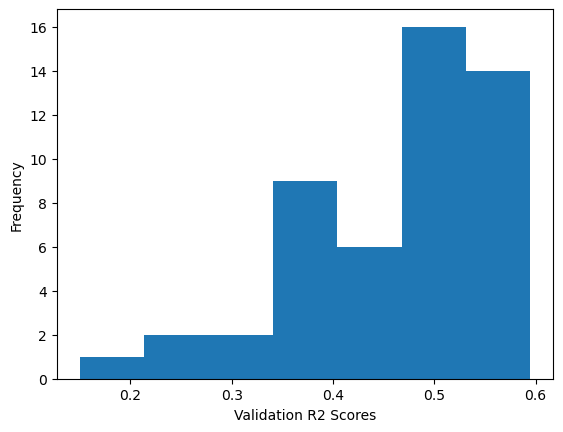

In [84]:
import matplotlib.pyplot as plt
plt.hist(r2_list, bins=int(np.sqrt(len(r2_list))))
plt.xlabel("Validation R2 Scores")
plt.ylabel("Frequency")

In [87]:
# Calculate mean
mean = np.mean(r2_list)

# Calculate median
median = np.median(r2_list)

# Calculate minimum
minimum = np.min(r2_list)

# Calculate maximum
maximum = np.max(r2_list)

In [92]:
cv_idx = np.arange(50)
r2df = pd.DataFrame()
r2df["cv"] = cv_idx
r2df["r2"] = r2_list
r2df.to_csv("r2_scores_per_cv.csv")

In [88]:
quantiles = np.percentile(r2_list, [25, 50, 75])

In [89]:
print("Mean:", mean)
print("Median:", median)
print("Minimum:", minimum)
print("Maximum:", maximum)
print("Quantiles (25th, 50th, 75th):", quantiles)

Mean: 0.466473570214221
Median: 0.49470245793825357
Minimum: 0.14982225564565066
Maximum: 0.5949457762292691
Quantiles (25th, 50th, 75th): [0.39421651 0.49470246 0.53340864]


In [78]:
train_residuals

Sample.ID
F001    0.07670
F004   -0.39080
F005   -0.43401
F006    0.32926
F007   -0.31366
         ...   
F448    0.77288
F313   -0.54828
F038    0.06323
F179    0.15942
F339    0.47214
Name: Gutted.Weight.kg, Length: 246, dtype: float64

In [71]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the parameter search space
param_space = {
    'n_estimators': (100, 1000),
    'max_depth': (50, 500),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20),
    'max_features': (0.1, 1.0)
}

In [72]:
# Perform Bayesian optimization
opt = BayesSearchCV(
    model,
    param_space,
    scoring='neg_mean_squared_error',  # Use negative mean squared error as the objective function to maximize
    cv=5,
    n_iter=20,  # Number of iterations for the Bayesian optimization process
    random_state=42
)

In [73]:
# Fit the optimizer to the training data
opt.fit(X_train, y_train)

# Get the best hyperparameters found by the optimizer
best_params = opt.best_params_
print("Best Hyperparameters:", best_params)

/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best Hyperparameters: OrderedDict({'max_depth': 100, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500})


In [74]:
# Make predictions using the best estimator
preds = opt.best_estimator_.predict(X_test)

# Calculate the mean squared error (MSE) on the test set
mse = mean_squared_error(y_test, preds)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
print(f"r2 {r2} mae {mae}")

Mean Squared Error: 0.9690159253645159
r2 0.4023169142837152 mae 0.7799699999999996
